   age  salary  experience  target
0   25   50000           2       1
1   32   60000           5       0
2   47   80000          10       1
3   51  120000          15       0
4   62  100000          20       1


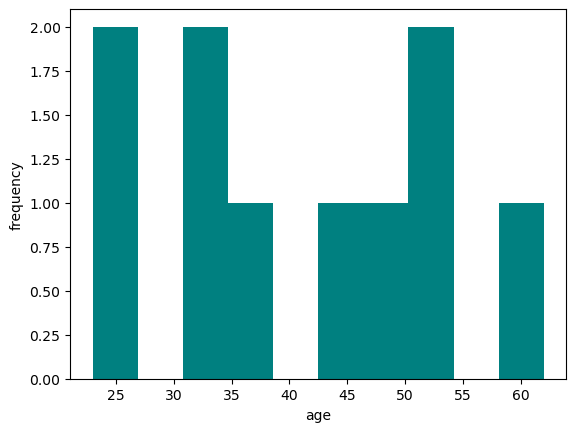

In [2]:
# Task 1

# Subtask 1
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and print data
data = pd.read_csv(r"C:\Users\abrao\Documents\Archive\data.csv")
print(data.head(5))

# Subtask 2
# Histogram of age distribution
plt.hist(data['age'], color='teal')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [16]:
# Task 2

# Subtask 1
x = data.drop('target', axis=1)
y = data['target']

# Subtask 2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [26]:
# Task 3

# Subtask 1
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Subtask 2
from sklearn.metrics import mean_squared_error

linear_rgs = LinearRegression().fit(x_train, y_train)
linear_rgs_y_pred = linear_rgs.predict(x_test)
linear_rgs_mse = mean_squared_error(y_test, linear_rgs_y_pred)

randon_forest_rgs = RandomForestRegressor().fit(x_train, y_train)
randon_forest_rgs_y_pred = randon_forest_rgs.predict(x_test)
randon_forest_rgs_mse = mean_squared_error(y_test, randon_forest_rgs_y_pred)

gradient_boostin_rgs = GradientBoostingRegressor().fit(x_train, y_train)
gradient_boostin_rgs_y_pred = gradient_boostin_rgs.predict(x_test)
gradient_boostin_rgs_mse = mean_squared_error(y_test, gradient_boostin_rgs_y_pred)

data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regression'],
    'MSE': [linear_rgs_mse, randon_forest_rgs_mse, gradient_boostin_rgs_mse]
}

print(pd.DataFrame(data))

# Subtask 3
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [1, 10, 100, 1000],
    'min_samples_split': [2, 3, 4, 5],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search_y_pred = grid_search.predict(x_test)
grid_search_mse = mean_squared_error(y_test, grid_search_y_pred)

print(f'old score: {randon_forest_rgs_mse}. new score: {grid_search_mse}')

                          Model       MSE
0             Linear Regression  0.195393
1       Random Forest Regressor  0.286100
2  Gradient Boosting Regression  0.499107
old score: 0.28609999999999997. new score: 0.25311151464852605
